## Análise Estatística e Modelagem Preditiva para Séries Temporais

### 1. Análise Exploratória

In [1]:
# Pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Carga dos dados
df_clima = pd.read_csv('dados_clima.csv', index_col=0)

#### Estrutura do dataframe

In [ ]:
df_clima.shape

In [ ]:
df_clima.head(5)

In [ ]:
# Tipos dos dados
df_clima.dtypes

In [ ]:
# Valores nulos
df_clima.isnull().sum()

### 2. Processamento e Visualização

In [3]:
# Convertendo a Data
df_clima['Data'] = pd.to_datetime(df_clima['Data'])

In [4]:
# Transformando a Data em índice
df_clima.set_index("Data", inplace=True)

In [ ]:
df_clima.index

### 3. Resumo Estatístico

In [ ]:
df_clima.describe()

### 4. Distribuição das Variáveis

In [ ]:
# Histogramas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribuição das Variáveis', fontsize=16)

variaveis = df_clima.columns

for ax, var in zip(axes.flat, variaveis):
    sns.histplot(df_clima[var], kde=True, ax=ax, bins=30)
    ax.set_title(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
print(df_clima[['Temperatura_C', 'Precipitacao_mm']].describe())

### 4.1 Outliers

In [ ]:
def id_outliers(df_clima, colunas):
    outliers = {}
    for coluna in colunas:
        Q1 = df_clima[coluna].quantile(0.25)
        Q3 = df_clima[coluna].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        outliers[coluna] = df_clima[(df_clima[coluna] < lim_inf) | (df_clima[coluna] > lim_sup)][coluna]
    return outliers

In [ ]:
outliers = id_outliers(df_clima, ['Temperatura_C', 'Precipitacao_mm'])

In [ ]:
for coluna, valores in outliers.items():
    print(f"Outliers em {coluna}:")
    print(valores)
    print('-' * 50)

### 5. Séries Temporais

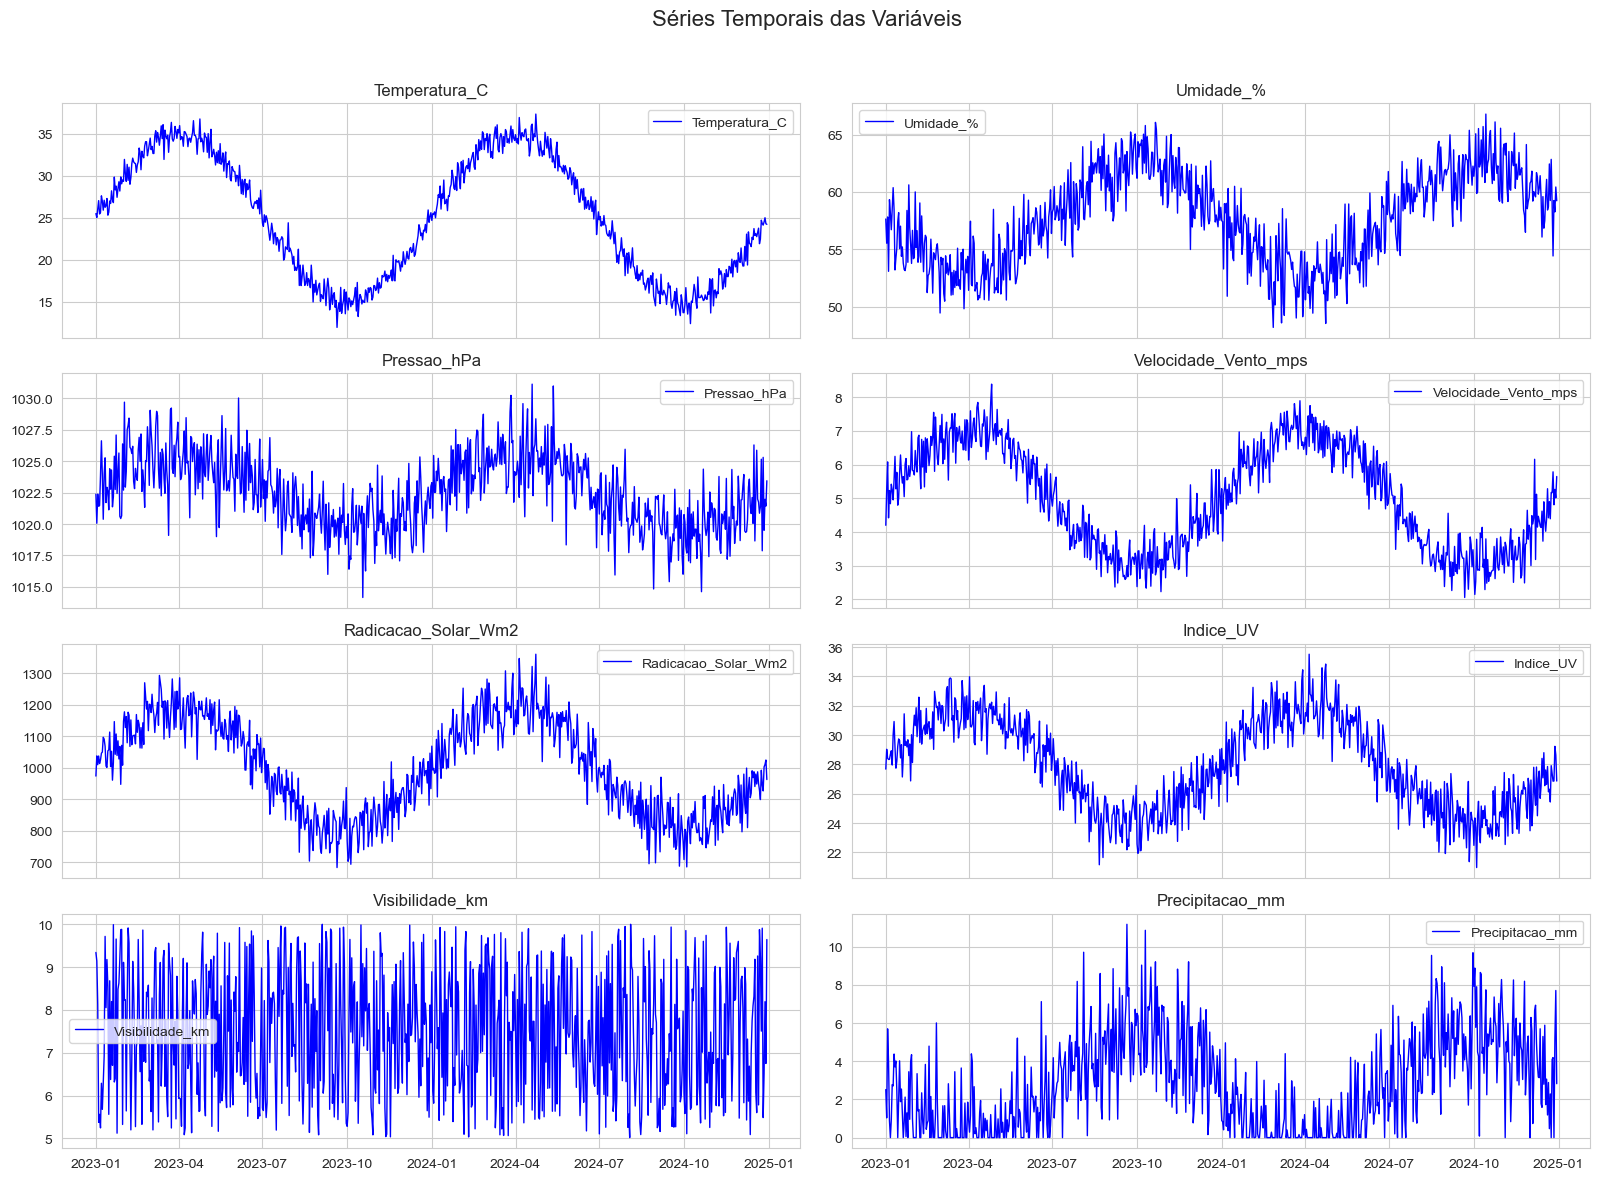

In [5]:
# Gráficos de séries temporais de todas as variáveis
sns.set_style('whitegrid')

fig, axes = plt.subplots(4, 2, figsize=(16, 12), sharex=True)
fig.suptitle('Séries Temporais das Variáveis', fontsize=16)

variaveis = df_clima.columns
axes = axes.flatten()

for ax, var in zip(axes, variaveis):
    ax.plot(df_clima.index, df_clima[var], label=var, color='b', linewidth=1)
    ax.set_title(var)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 5.1 Série Temporal - Temperatura

In [ ]:
# Gráfico com Temperatura ao longo do tempo
df_tempMensal = df_clima['Temperatura_C'].resample('M').mean()

plt.figure(figsize=(12, 5))
plt.plot(df_tempMensal.index, df_tempMensal, marker='o', linestyle='-', color='g', label='Temperatura Média Mensal')

plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.title('Variação Mensal da Temperatura')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Médias de Temperatura mensal
maior_temp = df_tempMensal.idxmax(), df_tempMensal.max()
menor_temp = df_tempMensal.idxmin(), df_tempMensal.min()

print(f"Maior média: {maior_temp[0].strftime('%Y-%m')} -> {maior_temp[1]:.2f}°C")
print(f"Menor média: {menor_temp[0].strftime('%Y-%m')} -> {menor_temp[1]:.2f}°C")

In [ ]:
# Gráfico com as médias mínima e máxima
plt.figure(figsize=(12, 5))
plt.plot(df_tempMensal.index, df_tempMensal, marker="o", linestyle="-", color="g", label="Temperatura Média Mensal")

# Destacar a maior e menor temperatura
plt.scatter(maior_temp[0], maior_temp[1], color="r", s=100, label=f"Máx: {maior_temp[1]:.2f}°C")
plt.scatter(menor_temp[0], menor_temp[1], color="b", s=100, label=f"Mín: {menor_temp[1]:.2f}°C")

# Ajustes visuais
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")
plt.title("Variação Mensal da Temperatura")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Exibir o gráfico
plt.show()

### 5.1.1 Decomposição da Série Temporal

In [ ]:
# Agrupa e calcula a média mensal
df_mensal = df_clima['Temperatura_C'].resample('M').mean()

# Define o período
if len(df_mensal) >= 24:
    periodo = 12
else:
    periodo = len(df_mensal) // 2
    
# Decomposição Aditiva
decomp = seasonal_decompose(df_tempMensal, model='additive', period=periodo, extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (16, 8)})
decomp.plot().suptitle('Decomposição Aditiva da Temperatura', fontsize=16)
plt.show()

In [ ]:
# Média mensal separada por ano
df_mensal_ano = df_clima['Temperatura_C'].groupby([df_clima.index.year, df_clima.index.month]).mean().unstack(level=0)

# Gráfico comparando os anos
df_mensal_ano.plot(kind='line', marker='o', figsize=(12, 6), title='Média Mensal de Temperatura (2023 vs 2024)')
plt.xlabel('Mês')
plt.ylabel('Temperatura Média (°C)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title="Ano")
plt.show()

### 5.2 Correlações

In [ ]:
df_corr = df_clima.corr()
print(df_corr)

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', cbar=True)

# Ajuste do título
plt.title("Matriz de Correlação das Variáveis Climáticas", fontsize=16)

# Exibir o gráfico
plt.show()

### 6. Modelagem Preditiva

#### 6.1. Regressão Linear Múltipla

In [5]:
# Pacotes necessários
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df_clima.head(5)

In [ ]:
df_clima.shape

In [ ]:
# Variáveis preditoras e target
X = df_clima.drop(columns=['Temperatura_C'])
y = df_clima['Temperatura_C']

In [ ]:
# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo de Regressão Linear
modelo_rl = LinearRegression()

modelo_rl.fit(X_train, y_train)

In [ ]:
# Previsões
y_pred = modelo_rl.predict(X_test)

In [ ]:
# Avaliação do Modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"R2: {r2:.2f}")

In [ ]:
# Gráfico Previsões x Valores Reais
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha de 45 graus
plt.xlabel('Temperatura Real (°C)')
plt.ylabel('Temperatura Prevista (°C)')
plt.title('Previsão da Temperatura com Regressão Linear')
plt.show()

#### Conclusão: O modelo de Regressão Linear Múltipla funciona bem para os nossos dados

### 6.2 SARIMA

In [17]:
# Pacote necessário
# from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

In [7]:
# Target
train = df_clima['Temperatura_C']
train = train.asfreq('D')

In [12]:
# Modelo SARIMA
modelo_sarima = SARIMAX(train,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 30),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

In [14]:
# Treino
sarima_result = modelo_sarima.fit()

In [15]:
# Previsões
predicts = sarima_result.predict(start=0, end=len(train)-1)

In [18]:
mse = mean_squared_error(train, predicts)
rmse = np.sqrt(mse)

print(f"Erro Quadrático Médio (MSE) - Modelo: {mse}")
print(f"Raiz do Erro Quadrático Médio (RMSE) - Modelo: {rmse}")

Erro Quadrático Médio (MSE) - Modelo: 2.784682833166284
Raiz do Erro Quadrático Médio (RMSE) - Modelo: 1.6687368975264747


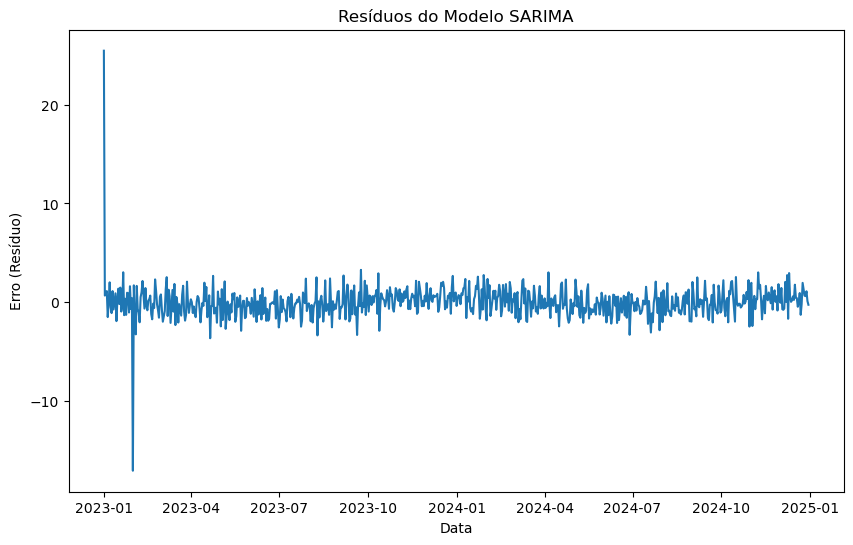

In [20]:
residuos = train - predicts

plt.figure(figsize=(10, 6))
plt.plot(residuos)
plt.title('Resíduos do Modelo SARIMA')
plt.xlabel('Data')
plt.ylabel('Erro (Resíduo)')
plt.show()

#### Conclusão: O modelo SARIMA parece estar funcionando bem para prever a Temperatura.